In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))

In [2]:

from src.pipeline.modules.clip import ClipFast
from src.pipeline.modules.helper.vision import rotation_image_proper
from src.pipeline.modules.cloth_categories import ClothingCategories
from src.pipeline.modules.cloth_matrix import ClothingSimilarity



from config.path import get_training_data_path
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [3]:
clip_instance = ClipFast(model_name='ViT-L/14')

In [4]:
class_name = 'dress'
relative_path = get_training_data_path('production', class_name)
fullpath = os.path.join(relative_path, 'frame280_dress_shirt_.jpg')

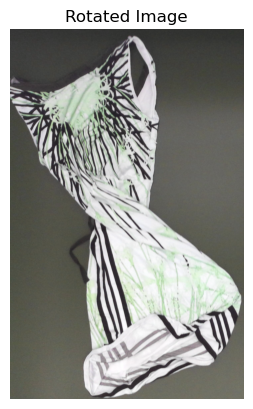

[['dress', 0.50830078125], ['shirt', 0.40869140625], ['pant', 0.04046630859375], ['jacket', 0.042388916015625]]


In [5]:
image = cv2.imread(fullpath)

rot_accuracy = []
clip_instance.classes = ['dress', 'shirt', 'pant', 'jacket']

for i in range(0,1):

    rot_frame_rgb = image

    # Display the rotated image using Matplotlib
    plt.imshow(rot_frame_rgb)
    plt.title('Rotated Image')
    plt.axis('off')  # Hide axis
    plt.show()

    clip_instance.image = rot_frame_rgb
    res = clip_instance.process(rot_frame_rgb)
    print(res)

In [7]:
ClothingSimilarity.get_weighted_accuracy(0, clip_instance.classes, res, ClothingSimilarity.high_level_matrix)

[['shirt', 0.704461669921875],
 ['dress', 0.647479248046875],
 ['pant', 0.41997985839843754],
 ['jacket', 0.301611328125]]